In [5]:
from IPython.core.display import HTML

problem_definition = """
<h2>Problem Definition</h2>
<p>Explain the problem you are trying to solve.</p>
<p>Creating AI classification model that can predict the outcome of NBA games.</p>
<p>Dataset Source: https://www.kaggle.com/datasets/nathanlauga/nba-games</p>
"""

HTML(problem_definition)

In [8]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

PATH = "C:/Users/sjind/ASingh/BCIT-4th-term/PredictiveMachineLearning/Assignments/Assignment1/"
CSV_FILE = "nba_df_final.csv"

df = pd.read_csv(PATH + CSV_FILE)
print(df.head())



              Home                   Away   Game_ID  H_Score  H_W_PCT  \
0    Brooklyn Nets        New York Knicks  21800018      107      0.0   
1      LA Clippers  Oklahoma City Thunder  21800025      108      0.0   
2    Orlando Magic      Charlotte Hornets  21800017       88      1.0   
3        Utah Jazz  Golden State Warriors  21800024      123      1.0   
4  Milwaukee Bucks         Indiana Pacers  21800023      118      1.0   

   H_FG_PCT  H_FG3_PCT  H_FT_PCT  H_REB  H_AST  ...  A_TS_PCT  Result  \
0     0.488      0.185     0.682   38.6   27.7  ...     0.559       1   
1     0.398      0.286     0.833   44.8   20.0  ...     0.466       1   
2     0.415      0.280     0.613   49.5   19.4  ...     0.551       0   
3     0.519      0.481     0.737   41.1   19.6  ...     0.525       0   
4     0.494      0.412     0.750   55.3   25.2  ...     0.626       1   

         Date   Season  Home_W_Pct_10  Away_W_Pct_10  H_Team_Elo_Before  \
0  2018-10-19  2018-19            0.0          

In [9]:
print(df.describe())

            Game_ID      H_Score      H_W_PCT     H_FG_PCT    H_FG3_PCT  \
count  2.820000e+03  2820.000000  2820.000000  2820.000000  2820.000000   
mean   2.187852e+07   112.637943     0.498310     0.458117     0.356012   
std    7.636666e+04    12.590916     0.184242     0.019121     0.024634   
min    2.180002e+07    73.000000     0.000000     0.298000     0.156000   
25%    2.180072e+07   104.000000     0.381000     0.447000     0.344000   
50%    2.190022e+07   112.000000     0.500000     0.458000     0.354000   
75%    2.190093e+07   121.000000     0.633000     0.471000     0.369000   
max    2.200064e+07   161.000000     1.000000     0.560000     0.563000   

          H_FT_PCT        H_REB        H_AST        H_TOV        H_STL  ...  \
count  2820.000000  2820.000000  2820.000000  2820.000000  2820.000000  ...   
mean      0.766759    44.291099    23.732092    14.503652     7.561560  ...   
std       0.038920     2.346305     2.123006     1.387942     1.065395  ...   
min     

In [10]:
#Dropping non-numeric and date columns.

numeric_df = df.drop(['Home', 'Away', 'Game_ID', 'H_Score', 'A_Score', 'Date', 'Season', 'H_Team_Elo_After', 'A_Team_Elo_After'], 1)

numeric_df.head()
numeric_df.info()
numeric_df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2820 entries, 0 to 2819
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   H_W_PCT            2820 non-null   float64
 1   H_FG_PCT           2820 non-null   float64
 2   H_FG3_PCT          2820 non-null   float64
 3   H_FT_PCT           2820 non-null   float64
 4   H_REB              2820 non-null   float64
 5   H_AST              2820 non-null   float64
 6   H_TOV              2820 non-null   float64
 7   H_STL              2820 non-null   float64
 8   H_BLK              2820 non-null   float64
 9   H_PLUS_MINUS       2820 non-null   float64
 10  H_OFF_RATING       2820 non-null   float64
 11  H_DEF_RATING       2820 non-null   float64
 12  H_TS_PCT           2820 non-null   float64
 13  A_W_PCT            2820 non-null   float64
 14  A_FG_PCT           2820 non-null   float64
 15  A_FG3_PCT          2820 non-null   float64
 16  A_FT_PCT           2820 

Index(['H_W_PCT', 'H_FG_PCT', 'H_FG3_PCT', 'H_FT_PCT', 'H_REB', 'H_AST',
       'H_TOV', 'H_STL', 'H_BLK', 'H_PLUS_MINUS', 'H_OFF_RATING',
       'H_DEF_RATING', 'H_TS_PCT', 'A_W_PCT', 'A_FG_PCT', 'A_FG3_PCT',
       'A_FT_PCT', 'A_REB', 'A_AST', 'A_TOV', 'A_STL', 'A_BLK', 'A_PLUS_MINUS',
       'A_OFF_RATING', 'A_DEF_RATING', 'A_TS_PCT', 'Result', 'Home_W_Pct_10',
       'Away_W_Pct_10', 'H_Team_Elo_Before', 'A_Team_Elo_Before'],
      dtype='object')

In [11]:
HTML("""
<h2>Exploratory Data Analysis </h2><br>
<div style="background-color: #f9f9f9; border: 1px solid #ddd; padding: 20px; border-radius: 5px; color: black;">
    <h4 style="font-size: 18px; font-weight: bold;">Dataframe Description:</h4>
    <p style="font-size: 14px;"> 
    The dataset consists of properties such as W_Pct, Def_Rating, Plus_Minus for both the Home and Away Team.<br>
    These properties are statistics that are recorded for every game and these stats play a crucial role in deciding the outcome of the game.<br>
    For Example:
    </p>
    <ul style="list-style-type: square; font-size: 12px; margin-left: 20px;">
        <li><span style="color: #0066cc; font-weight: 400;">H_FG_PCT:</span> The percentage of field goals that a player or team has made that fit the specified criteria: Higher FG_PCT = Higher chances of winning!</li>
        <li><span style="color: #0066cc; font-weight: 400;">PLUS_MINUS:</span> The point differential when a player or team is on the floor: Higher FG_PCT = Higher chances of winning!</li>
        <li><span style="color: #0066cc; font-weight: 400;">DEF_RATING:</span> The number of points allowed per 100 possessions by a team: Higher DEF_RATING = Lower chances of winning!</li>
    </ul>
     <p style="font-size: 14px;"> 
     For more information, visit this link: <a href="https://www.nba.com/stats/help/glossary">NBA Glossary</a>
     </p>
</div>
""")

<Axes: >

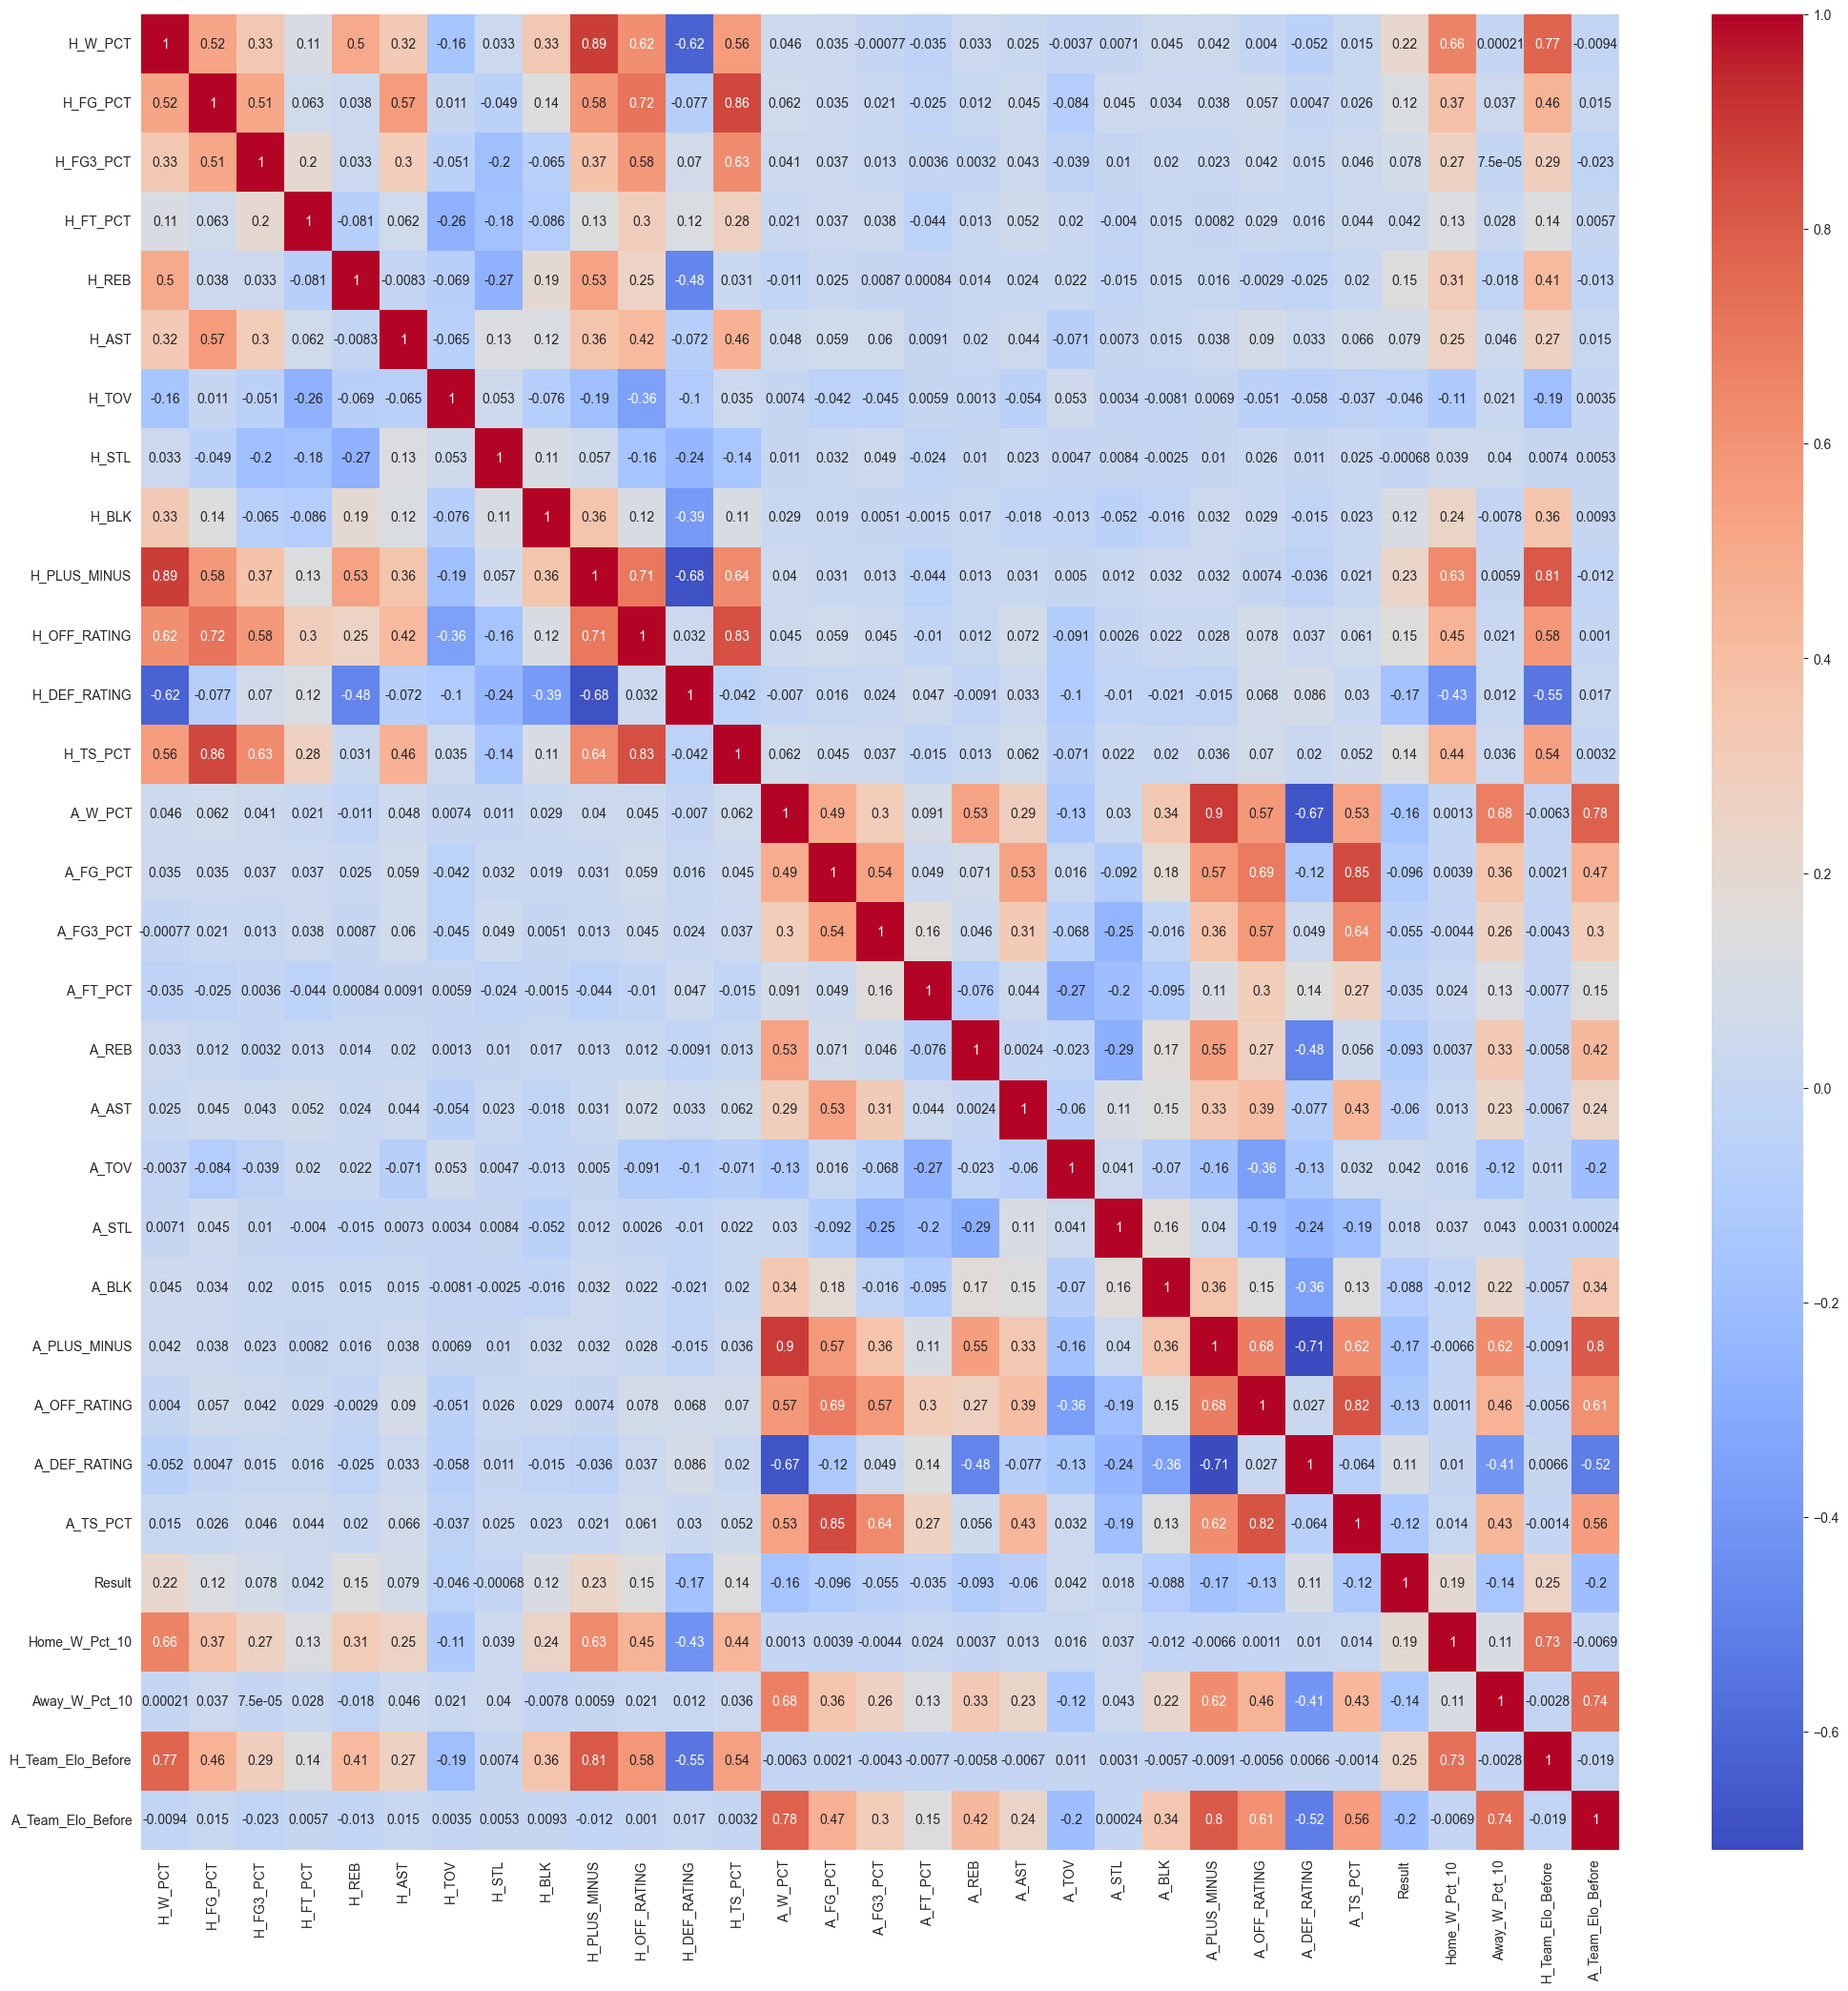

In [12]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(25, 25))
# assume you have a DataFrame named 'df'
corr_matrix = numeric_df.corr()

# create a correlation heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')


In [ ]:
HTML("""
<div style="background-color: #f9f9f9; border: 1px solid #ddd; padding: 20px; border-radius: 5px;">
    <h4 style="font-size: 18px; font-weight: bold;">Correlation Matrix Conclusions; Feature Segmentation</h4>
    <p style="font-size: 16px;"> 
        Highest Positive Correlation; features that improve the chances of winning a game.
    </p>
    <ul style="list-style-type: square; font-size: 12px; margin-left: 20px;">
        <li><span style="color: #0066cc; font-weight: 400;">W_PCT</li>
        <li><span style="color: #0066cc; font-weight: 400;">PLUS_MINUS</li>
        <li><span style="color: #0066cc; font-weight: 400;">ELO</li>
    </ul>
    <p style="font-size: 16px;"> 
        Negative Correlation; features that reduce the chance of winning a game.
    </p>
    <ul style="list-style-type: square; font-size: 12px; margin-left: 20px;">
        <li><span style="color: #0066cc; font-weight: 400;">TOV</li>
        <li><span style="color: #0066cc; font-weight: 400;">STL</li>
        <li><span style="color: #0066cc; font-weight: 400;">DEF_RATING</li>
    </ul>
     <p style="font-size: 14px;"> 
     Some other notable important metrics:<br>
     REB, BLK, OFF_RATING, and W_PCT_10
     </p>
</div>
""")

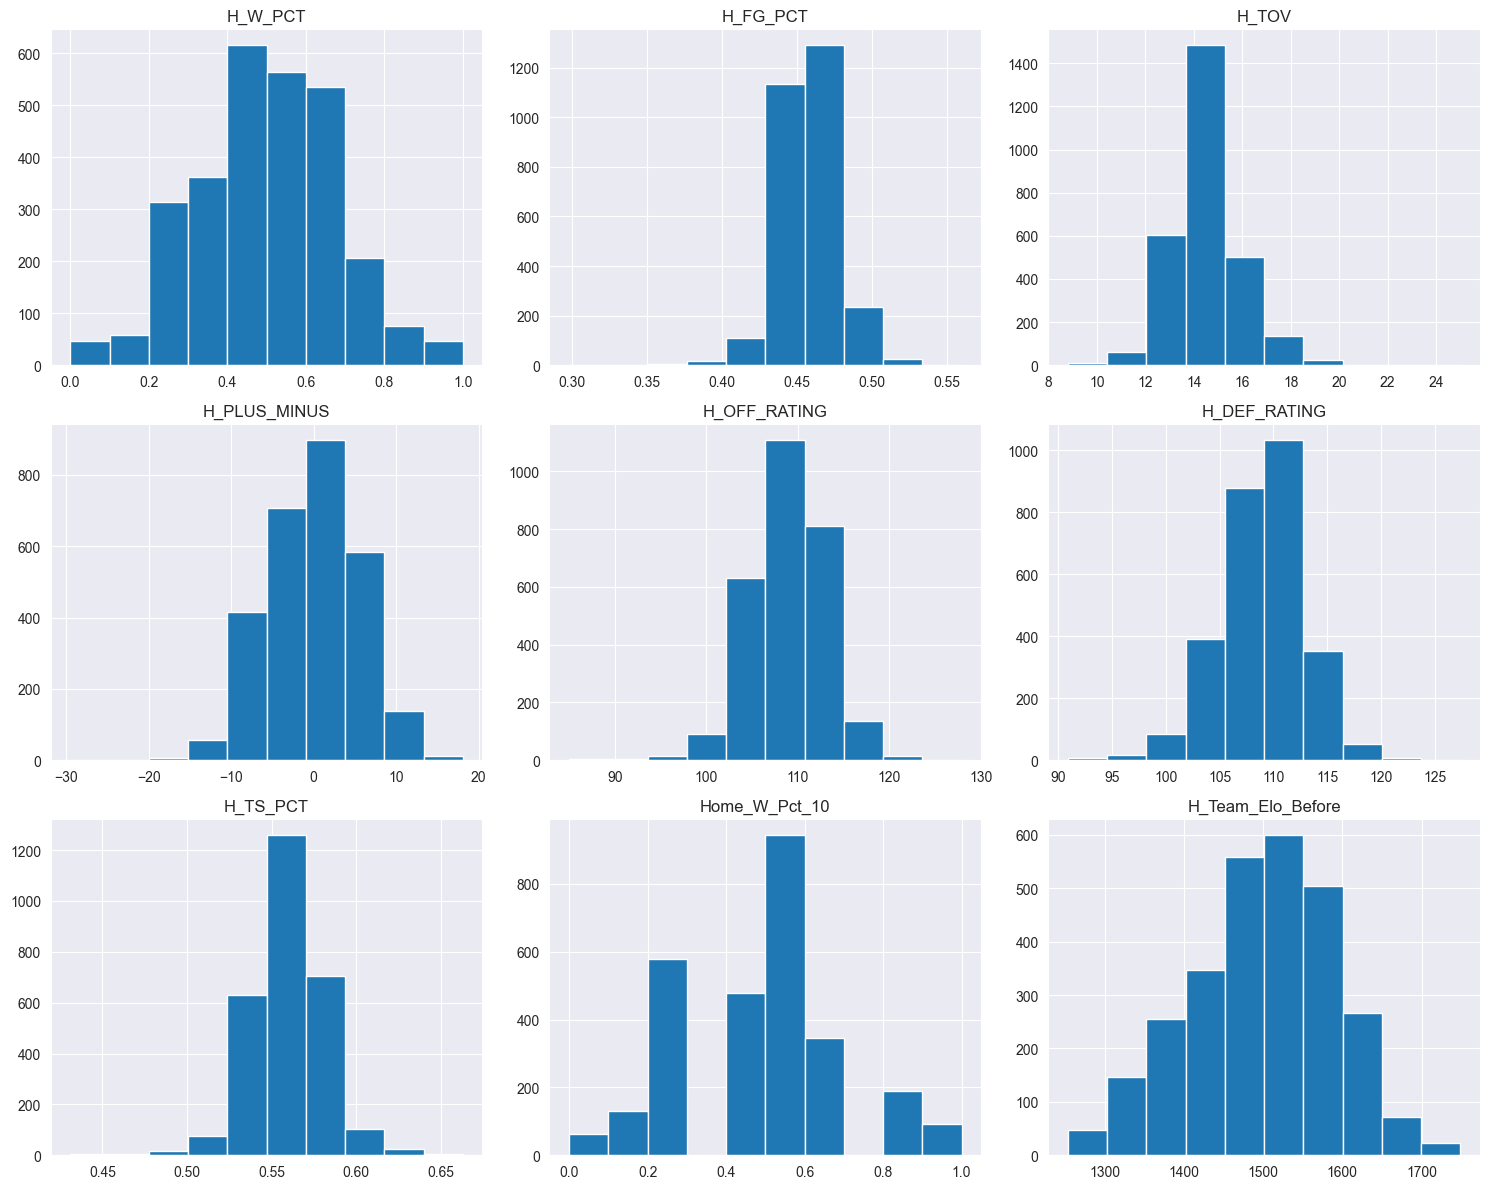

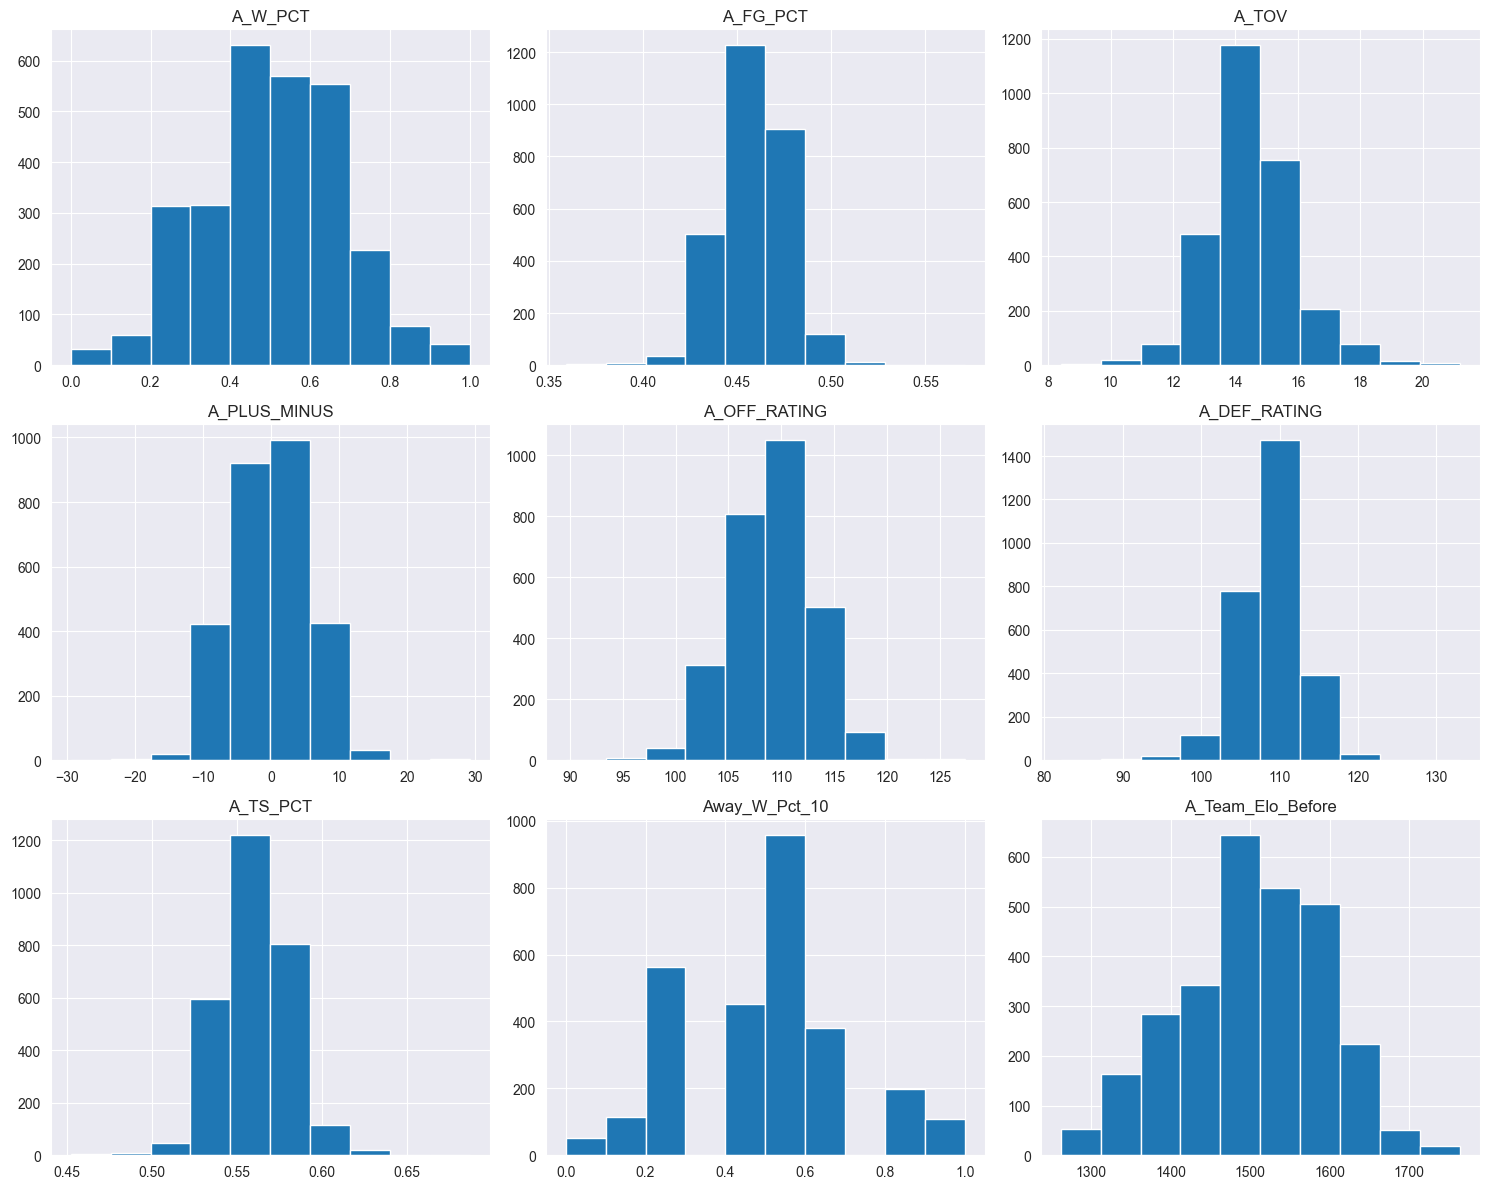

In [9]:

#Drew histograms to find some information anout the important features but didn't find anything solid.

import pandas as pd
import matplotlib.pyplot as plt

def plot_histograms(cols):
    df = numeric_df
    num_cols = len(cols)
    rows = num_cols // 3 + (num_cols % 3 > 0)
    
    fig, axs = plt.subplots(rows, 3, figsize=(15, rows*4))
    
    for i, col in enumerate(cols):
        r = i // 3
        c = i % 3
        axs[r, c].hist(df[col])
        axs[r, c].set_title(col)
    
    plt.tight_layout()
    plt.show()
        
plot_histograms(['H_W_PCT', 'H_FG_PCT',
       'H_TOV', 'H_PLUS_MINUS', 'H_OFF_RATING',
       'H_DEF_RATING', 'H_TS_PCT', 'Home_W_Pct_10', 'H_Team_Elo_Before'])

plot_histograms(['A_W_PCT', 'A_FG_PCT',
       'A_TOV', 'A_PLUS_MINUS', 'A_OFF_RATING',
       'A_DEF_RATING', 'A_TS_PCT', 'Away_W_Pct_10', 'A_Team_Elo_Before'])


In [20]:

final_df = numeric_df[['H_W_PCT', 'H_FG_PCT', 'H_FG3_PCT', 'H_FT_PCT', 'H_REB', 'H_AST',
       'H_TOV', 'H_STL', 'H_BLK', 'H_PLUS_MINUS', 'H_OFF_RATING',
       'H_DEF_RATING', 'H_TS_PCT', 'A_W_PCT', 'A_FG_PCT', 'A_FG3_PCT',
       'A_FT_PCT', 'A_REB', 'A_AST', 'A_TOV', 'A_STL', 'A_BLK', 'A_PLUS_MINUS',
       'A_OFF_RATING', 'A_DEF_RATING', 'A_TS_PCT', 'Home_W_Pct_10',
       'Away_W_Pct_10', 'H_Team_Elo_Before', 'A_Team_Elo_Before']]
final_df.head()


,H_W_PCT,H_FG_PCT,H_FG3_PCT,H_FT_PCT,H_REB,H_AST,H_TOV,H_STL,H_BLK,H_PLUS_MINUS,...,A_STL,A_BLK,A_PLUS_MINUS,A_OFF_RATING,A_DEF_RATING,A_TS_PCT,Home_W_Pct_10,Away_W_Pct_10,H_Team_Elo_Before,A_Team_Elo_Before
0,0.0,0.488,0.185,0.682,38.6,27.7,18.8,8.9,5.0,-3.0,...,10.7,5.4,17.0,112.5,94.7,0.559,0.0,0.0,1500.0,1500.0
1,0.0,0.398,0.286,0.833,44.8,20.0,13.3,2.9,8.6,-8.6,...,11.7,5.8,-7.8,97.1,104.9,0.466,0.0,0.0,1500.0,1500.0
2,1.0,0.415,0.280,0.613,49.5,19.4,11.7,6.8,6.8,2.9,...,7.7,8.7,-1.0,107.7,109.7,0.551,0.0,0.0,1500.0,1500.0
3,1.0,0.519,0.481,0.737,41.1,19.6,15.9,7.5,3.7,5.6,...,6.8,6.8,7.8,104.9,97.1,0.525,0.0,0.0,1500.0,1500.0
4,1.0,0.494,0.412,0.750,55.3,25.2,20.4,4.9,3.9,1.0,...,2.1,7.3,29.2,115.6,87.4,0.626,0.0,0.0,1500.0,1500.0


In [21]:

HTML("""
    <h2>3.	Data Treatment</h2>
    <div>
        <h4>Feature Engineered metrics by the NBA.</h4>
        <p>
        The NBA feature engineers a few metrics that help determine the effectiveness of a team or a <br>
        player. These metrics are classified as advanced statistics. These statistics are used in the <br>
        model and are plus/minus (+/-), offensive rating, defensive rating, and true shooting percentage.
        </p>
        
        <h4>Feature Engineered metrics by the author.</h4>
        <p>
        1) The first feature that was feature engineered was Team Win Percentage over the past ten games. This <br>
        statistic gives the model an understanding as to how the team has been performing recently. <br><br>
        2) The second feature that was feature engineered was the team Elo rating. The Elo rating was <br>
        calculated after each team performance. The Elo rating is used to gauge team strength and <br>
        performance and it starts with a median score of 1500. For this model, all teams start with a <br>
        1500 and points are either added or subtracted based on point differential, upsets, location, <br>
        and game outcome.
        
        </p>
    </div>
""")


In [11]:
HTML("""
    <h2>4.	Model Development and Tuning</h2>
        <h4>Feature Selection</h4>
""")

In [22]:
from sklearn  import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import LogisticRegression
from sklearn.feature_selection import RFE

print("Recursive Feature Elimination")

# Seperate the target and independent variable
X = numeric_df.copy()       # Create separate copy to prevent unwanted tampering of data.
del X['Result']     # Delete target variable.

# Target variable
y = df['Result']

model = LogisticRegression(solver='liblinear')

# Specify the number of  features to select
rfe = RFE(estimator=model, n_features_to_select=15)

# fit the model
rfe = rfe.fit(X, y)

# Please uncomment the following lines to see the result
print('\n\nFEATURES SELECTED\n')
print(rfe.support_)

# Show top features.
print("Top 15 features selected by RFE:")
for i in range(0, len(X.keys())):
    if(rfe.support_[i]):
        print(X.keys()[i])


Recursive Feature Elimination


FEATURES SELECTED

[False False False False  True  True False  True  True  True  True False
 False  True False False False False  True False  True  True  True  True
  True False  True  True False False]
Top 15 features selected by RFE:
H_REB
H_AST
H_STL
H_BLK
H_PLUS_MINUS
H_OFF_RATING
A_W_PCT
A_AST
A_STL
A_BLK
A_PLUS_MINUS
A_OFF_RATING
A_DEF_RATING
Home_W_Pct_10
Away_W_Pct_10


In [23]:
from sklearn.feature_selection import f_regression

print("Forward Feature Elimination")

#  f_regression returns F statistic for each feature.
ffs = f_regression(X, y)

featuresDf = pd.DataFrame()
for i in range(0, len(X.columns)):
    featuresDf = featuresDf.append({"feature":X.columns[i],
                                    "ffs":ffs[0][i]}, ignore_index=True)
featuresDf = featuresDf.sort_values(by=['ffs'])
print(featuresDf)


Forward Feature Elimination
              feature         ffs
7               H_STL    0.001302
20              A_STL    0.889804
16           A_FT_PCT    3.407948
19              A_TOV    4.909391
3            H_FT_PCT    4.986147
6               H_TOV    5.871566
15          A_FG3_PCT    8.427243
18              A_AST   10.324697
2           H_FG3_PCT   17.411833
5               H_AST   17.651673
21              A_BLK   22.138493
17              A_REB   24.411049
14           A_FG_PCT   26.000072
24       A_DEF_RATING   34.570179
8               H_BLK   39.429747
1            H_FG_PCT   40.678083
25           A_TS_PCT   44.164563
23       A_OFF_RATING   47.515039
12           H_TS_PCT   54.280353
27      Away_W_Pct_10   57.319735
4               H_REB   61.575000
10       H_OFF_RATING   66.988304
13            A_W_PCT   70.936602
22       A_PLUS_MINUS   84.647721
11       H_DEF_RATING   84.905295
26      Home_W_Pct_10  111.026909
29  A_Team_Elo_Before  114.383143
0             H_W_PC

In [24]:

print("Feature Importance ")

# Read in data and display first 5 rows
PATH = "C:/Users/sjind/ASingh/BCIT-4th-term/PredictiveMachineLearning/Assignments/Assignment1/"
CSV_FILE = "nba_df_final.csv"

all_features = pd.read_csv(PATH + CSV_FILE)

# One-hot encode the data using pandas get_dummies
features = all_features.drop(['Home', 'Away', 'Game_ID', 'H_Score', 'A_Score', 'Date', 'Season', 'H_Team_Elo_After', 'A_Team_Elo_After'], 1)

# Display the first 5 rows of the last 12 columns.
print(features.head(5))

# Use numpy to convert to arrays
import numpy as np

# Labels are the values we want to predict
labels = np.array(features['Result'])
features= features.drop('Result', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels =\
    train_test_split(features, labels, test_size = 0.25, random_state = 42)

# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf.fit(features, labels)

importances = list(rf.feature_importances_)

# Present features and importance scores.
def showFeatureImportances(importances, feature_list):
    dfImportance = pd.DataFrame()
    for i in range(0, len(importances)):
        dfImportance = dfImportance.append({"importance":importances[i],
                                            "feature":feature_list[i] },
                                            ignore_index = True)

    dfImportance = dfImportance.sort_values(by=['importance'],
                                            ascending=False)
    print(dfImportance)
showFeatureImportances(importances, feature_list)



Feature Importance 
   H_W_PCT  H_FG_PCT  H_FG3_PCT  H_FT_PCT  H_REB  H_AST  H_TOV  H_STL  H_BLK  \
0      0.0     0.488      0.185     0.682   38.6   27.7   18.8    8.9    5.0   
1      0.0     0.398      0.286     0.833   44.8   20.0   13.3    2.9    8.6   
2      1.0     0.415      0.280     0.613   49.5   19.4   11.7    6.8    6.8   
3      1.0     0.519      0.481     0.737   41.1   19.6   15.9    7.5    3.7   
4      1.0     0.494      0.412     0.750   55.3   25.2   20.4    4.9    3.9   

   H_PLUS_MINUS  ...  A_BLK  A_PLUS_MINUS  A_OFF_RATING  A_DEF_RATING  \
0          -3.0  ...    5.4          17.0         112.5          94.7   
1          -8.6  ...    5.8          -7.8          97.1         104.9   
2           2.9  ...    8.7          -1.0         107.7         109.7   
3           5.6  ...    6.8           7.8         104.9          97.1   
4           1.0  ...    7.3          29.2         115.6          87.4   

   A_TS_PCT  Result  Home_W_Pct_10  Away_W_Pct_10  H_Team_El

In [48]:
HTML("Creating Basic Classification Models using different algorithms.")

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model    import RidgeClassifier

X = numeric_df.drop(columns = 'Result')

y = numeric_df['Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f'X train shape: {X_train.shape}')
print(f'X test shape: {X_test.shape}')

#script to test the effectivenes of each model, uses default parameters
#test six different classification models
def create_models(X_train, y_train, X_test, y_test) :
    '''
    Lightweight script to test many models and find winners
    :param X_train: training split
    :param y_train: training target vector
    :param X_test: test split
    :param y_test: test target vector
    :return: DataFrame of predictions
    '''

    dfs = []

    models = [
          ('LogReg', LogisticRegression()),
          ('RF', RandomForestClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('SVM', SVC()),
        ]

    results = []

    names = []

    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']

    target_names = ['win', 'loss']

    for name, model in models:

        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
        cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        print(name)
        print(classification_report(y_test, y_pred, target_names=target_names))

        results.append(cv_results)
        names.append(name)

        this_df = pd.DataFrame(cv_results)
        this_df['model'] = name
        dfs.append(this_df)

    final = pd.concat(dfs, ignore_index=True)

    return final

output = create_models(X_train, y_train, X_test, y_test)

print(output)

X train shape: (2115, 30)
X test shape: (705, 30)
LogReg
              precision    recall  f1-score   support

         win       0.57      0.49      0.53       301
        loss       0.65      0.72      0.69       404

    accuracy                           0.62       705
   macro avg       0.61      0.61      0.61       705
weighted avg       0.62      0.62      0.62       705

RF
              precision    recall  f1-score   support

         win       0.60      0.56      0.58       301
        loss       0.69      0.72      0.70       404

    accuracy                           0.65       705
   macro avg       0.64      0.64      0.64       705
weighted avg       0.65      0.65      0.65       705

KNN
              precision    recall  f1-score   support

         win       0.52      0.46      0.49       301
        loss       0.63      0.68      0.65       404

    accuracy                           0.59       705
   macro avg       0.57      0.57      0.57       705
weighted a

In [51]:
HTML(" Building Bagging Classifier.")
from sklearn.ensemble        import BaggingClassifier

X = numeric_df.drop(columns = 'Result')
y = numeric_df['Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f'X train shape: {X_train.shape}')
print(f'X test shape: {X_test.shape}')

def create_models(X_train, y_train, X_test, y_test) :
    '''
    Lightweight script to test many models and find winners
    :param X_train: training split
    :param y_train: training target vector
    :param X_test: test split
    :param y_test: test target vector
    :return: DataFrame of predictions
    '''

    dfs = []

    models = [
          ('Bg LogReg', LogisticRegression()),
          ('Bg RF', RandomForestClassifier()),
          ('Bg KNN', KNeighborsClassifier()),
          ('Bg SVM', SVC()),
        ]

    results = []

    names = []

    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']

    target_names = ['win', 'loss']

    for name, model in models:

        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)

        bagged_model = BaggingClassifier(model, max_samples=0.4, n_estimators=100)
        cv_results = model_selection.cross_validate(bagged_model, X_train, y_train, cv=kfold, scoring=scoring)
        bagged_clf = bagged_model.fit(X_train, y_train)
        y_pred = bagged_clf.predict(X_test)

        print(name)
        print(classification_report(y_test, y_pred, target_names=target_names))

        results.append(cv_results)
        names.append(name)

        this_df = pd.DataFrame(cv_results)
        this_df['model'] = "Bagging" + name
        dfs.append(this_df)

    final = pd.concat(dfs, ignore_index=True)

    return final
result2 = create_models(X_train, y_train, X_test, y_test)

X train shape: (2115, 30)
X test shape: (705, 30)
Bg LogReg
              precision    recall  f1-score   support

         win       0.56      0.48      0.52       301
        loss       0.65      0.72      0.69       404

    accuracy                           0.62       705
   macro avg       0.61      0.60      0.60       705
weighted avg       0.61      0.62      0.61       705

Bg RF
              precision    recall  f1-score   support

         win       0.58      0.50      0.54       301
        loss       0.66      0.73      0.69       404

    accuracy                           0.63       705
   macro avg       0.62      0.62      0.62       705
weighted avg       0.63      0.63      0.63       705

Bg KNN
              precision    recall  f1-score   support

         win       0.59      0.52      0.55       301
        loss       0.67      0.73      0.70       404

    accuracy                           0.64       705
   macro avg       0.63      0.62      0.62       705
w

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted,test_roc_auc,model
0,0.065000,0.009024,0.607565,0.604542,0.607565,0.605388,0.657472,LogReg
1,0.054166,0.009041,0.645390,0.641553,0.645390,0.636868,0.685760,LogReg
2,0.061961,0.005997,0.654846,0.653425,0.654846,0.646748,0.692621,LogReg
3,0.058016,0.010991,0.624113,0.620384,0.624113,0.615598,0.682141,LogReg
4,0.061999,0.006000,0.652482,0.646856,0.652482,0.643915,0.676427,LogReg
5,0.585232,0.661890,0.600473,0.601240,0.600473,0.600826,0.650969,RF
6,0.628061,0.035977,0.635934,0.631911,0.635934,0.631486,0.680815,RF
7,0.494969,0.039994,0.661939,0.659652,0.661939,0.658044,0.700996,RF
8,0.478001,0.033012,0.631206,0.627790,0.631206,0.624268,0.692157,RF
9,0.458292,0.032998,0.645390,0.643397,0.645390,0.644162,0.665203,RF


In [54]:
HTML("Building Ensembles using mlxted.classifier")

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.utils import class_weight
from xgboost                 import XGBClassifier, plot_importance
from sklearn.ensemble        import AdaBoostClassifier, GradientBoostingClassifier

from sklearn.metrics import classification_report
from sklearn.ensemble        import BaggingClassifier
from sklearn.linear_model    import RidgeClassifier
from mlxtend.classifier      import EnsembleVoteClassifier
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd


X = numeric_df.drop(columns = 'Result')

y = numeric_df['Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f'X train shape: {X_train.shape}')
print(f'X test shape: {X_test.shape}')

def create_models(X_train, y_train, X_test, y_test):
    '''
    Lightweight script to test many models and find winners
    :param X_train: training split
    :param y_train: training target vector
    :param X_test: test split
    :param y_test: test target vector
    :return: DataFrame of predictions
    '''

    dfs = []

    ada_boost   = AdaBoostClassifier()
    grad_boost  = GradientBoostingClassifier()
    xgb_boost   = XGBClassifier()

    eclf = EnsembleVoteClassifier(clfs=[ada_boost, grad_boost, xgb_boost], voting='hard')
    models = [
        ('ECLF', eclf),
        ('AdaBoost', ada_boost),
        ('GradientBoost', grad_boost)
    ]

    results = []
    names = []

    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
    target_names = ['win', 'loss']

    for name, model in models:
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
        cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        print(name)
        print(classification_report(y_test, y_pred, target_names=target_names))

        results.append(cv_results)
        names.append(name)

        this_df = pd.DataFrame(cv_results)
        this_df['model'] = name
        dfs.append(this_df)

    final = pd.concat(dfs, ignore_index=True)

    return final
print(result2)
output.append(result2, ignore_index=True)
result3 = create_models(X_train, y_train, X_test, y_test)
output.append(result3)


X train shape: (2115, 30)
X test shape: (705, 30)
     fit_time  score_time  test_accuracy  test_precision_weighted  \
0    5.201461    0.062502       0.598109                 0.594958   
1    5.234418    0.062504       0.657210                 0.654327   
2    5.218747    0.062500       0.657210                 0.656422   
3    5.218748    0.062501       0.631206                 0.628172   
4    5.234378    0.062512       0.652482                 0.646899   
5   20.007750    2.515628       0.614657                 0.614419   
6   20.359411    2.437467       0.643026                 0.638900   
7   20.093749    2.453122       0.650118                 0.647782   
8   19.906289    2.437502       0.643026                 0.640341   
9   20.265584    2.453163       0.628842                 0.622664   
10   0.093751    2.276680       0.609929                 0.606407   
11   0.140629    2.296870       0.628842                 0.624057   
12   0.125000    2.249999       0.635934             

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted,test_roc_auc,model
0,0.065000,0.009024,0.607565,0.604542,0.607565,0.605388,0.657472,LogReg
1,0.054166,0.009041,0.645390,0.641553,0.645390,0.636868,0.685760,LogReg
2,0.061961,0.005997,0.654846,0.653425,0.654846,0.646748,0.692621,LogReg
3,0.058016,0.010991,0.624113,0.620384,0.624113,0.615598,0.682141,LogReg
4,0.061999,0.006000,0.652482,0.646856,0.652482,0.643915,0.676427,LogReg
5,0.585232,0.661890,0.600473,0.601240,0.600473,0.600826,0.650969,RF
6,0.628061,0.035977,0.635934,0.631911,0.635934,0.631486,0.680815,RF
7,0.494969,0.039994,0.661939,0.659652,0.661939,0.658044,0.700996,RF
8,0.478001,0.033012,0.631206,0.627790,0.631206,0.624268,0.692157,RF
9,0.458292,0.032998,0.645390,0.643397,0.645390,0.644162,0.665203,RF


In [32]:
print("Building Stacked Model")

from sklearn.linear_model    import LogisticRegression
from sklearn.tree            import DecisionTreeClassifier
from sklearn.ensemble        import AdaBoostClassifier
from sklearn.ensemble        import RandomForestClassifier
from sklearn.metrics         import classification_report
from sklearn.model_selection import train_test_split
import numpy  as np
import pandas as pd

X = numeric_df.drop(columns = 'Result')
y = numeric_df['Result']

def getUnfitModels():
    models = list()
    models.append(LogisticRegression())
    models.append(DecisionTreeClassifier())
    models.append(AdaBoostClassifier())
    models.append(RandomForestClassifier(n_estimators=100))
    models.append(SVC())
    return models

def evaluateModel(y_test, predictions, model):
    print("\n*** " + model.__class__.__name__)
    report = classification_report(y_test, predictions)
    print(report)

def fitBaseModels(X_train, y_train, X_test, models):
    dfPredictions = pd.DataFrame()

    # Fit base model and store its predictions in dataframe.
    for i in range(0, len(models)):
        models[i].fit(X_train, y_train)
        predictions = models[i].predict(X_test)
        colName = str(i)
        dfPredictions[colName] = predictions
    return dfPredictions, models

def fitStackedModel(X, y):
    model = LogisticRegression()
    model.fit(X, y)
    return model

# Split data into train, test and validation sets.
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.70)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.50)

# Get base models.
unfitModels = getUnfitModels()

# Fit base and stacked models.
dfPredictions, models = fitBaseModels(X_train, y_train, X_val, unfitModels)
stackedModel          = fitStackedModel(dfPredictions, y_val)

# Evaluate base models with validation data.
print("\n** Evaluate Base Models **")
dfValidationPredictions = pd.DataFrame()
for i in range(0, len(models)):
    predictions = models[i].predict(X_test)
    colName = str(i)
    dfValidationPredictions[colName] = predictions
    # evaluateModel(y_test, predictions, models[i])

# Evaluate stacked model with validation data.
stackedPredictions = stackedModel.predict(dfValidationPredictions)
print("\n** Evaluate Stacked Model **")
evaluateModel(y_test, stackedPredictions, stackedModel)





Building Stacked Model

** Evaluate Base Models **

** Evaluate Stacked Model **

*** LogisticRegression
              precision    recall  f1-score   support

           0       0.61      0.44      0.51       423
           1       0.65      0.79      0.72       564

    accuracy                           0.64       987
   macro avg       0.63      0.61      0.61       987
weighted avg       0.64      0.64      0.63       987



In [44]:
HTML("""
    <h1>5.	Model Evaluation</h1>

    <h3> Stand Alone Models </h3>
    <table style="border-collapse: collapse; width: 100%;">
  <thead>
    <tr style="background-color: black;">
      <th>Models</th>
      <th>Precision </th>
      <th>Recall   </th>
      <th>F1 Score </th>
      <th>Accuracy</th>
    </tr>
  </thead>
  <tbody>
    <tr style="border: 1px solid #ddd; padding: 8px;">
      <td>Logistic Regression</td>
      <td>0.61</td>
      <td>0.605</td>
      <td>0.61</td>
      <td>0.62</td>
    </tr>
    <tr style="border: 1px solid #ddd; padding: 8px;">
      <td>RandomForestClassifier</td>
      <td>0.625</td>
      <td>0.62</td>
      <td>0.62</td>
      <td>0.64</td>
    </tr>
    <tr style="border: 1px solid #ddd; padding: 8px;">
      <td>KNN</td>
      <td>0.575</td>
      <td>0.57</td>
      <td>0.57</td>
      <td>0.59</td>
    </tr>
    <tr style="border: 1px solid #ddd; padding: 8px;">
      <td>Support Vector Machine</td>
      <td>0.625</td>
      <td>0.59</td>
      <td>0.58</td>
      <td>0.63</td>
    </tr>
  </tbody>
  </table>
  <br>
  <br>

      <h3> Bagged Models </h3>
    <table style="border-collapse: collapse; width: 100%;">
  <thead>
    <tr style="background-color: black;">
      <th>Models</th>
      <th>Precision </th>
      <th>Recall   </th>
      <th>F1 Score </th>
      <th>Accuracy</th>
    </tr>
  </thead>
  <tbody>
    <tr style="border: 1px solid #ddd; padding: 8px;">
      <td>Logistic Regression</td>
      <td>0.61</td>
      <td>0.605</td>
      <td>0.605</td>
      <td>0.62</td>
    </tr>
    <tr style="border: 1px solid #ddd; padding: 8px;">
      <td>RandomForestClassifier</td>
      <td>0.63</td>
      <td>0.62</td>
      <td>0.615</td>
      <td>0.64</td>
    </tr>
    <tr style="border: 1px solid #ddd; padding: 8px;">
      <td>KNN</td>
      <td>0.63</td>
      <td>0.625</td>
      <td>0.63</td>
      <td>0.64</td>
    </tr>
    <tr style="border: 1px solid #ddd; padding: 8px;">
      <td>Support Vector Machine</td>
      <td>0.645</td>
      <td>0.545</td>
      <td>0.49</td>
      <td>0.61</td>
    </tr>
  </tbody>
  </table>
  <p>KNN seems to gain the most from Bagging</p>
  <br>

        <h3> Ensemble </h3>
    <table style="border-collapse: collapse; width: 100%;">
  <thead>
    <tr style="background-color: black;">
      <th>Models</th>
      <th>Precision </th>
      <th>Recall   </th>
      <th>F1 Score </th>
      <th>Accuracy</th>
    </tr>
  </thead>
  <tbody>
      <tr style="border: 1px solid #ddd; padding: 8px;">
      <td>Ensemble (ECLF)</td>
      <td>0.625</td>
      <td>0.62</td>
      <td>0.62</td>
      <td>0.63</td>
    </tr>
    <tr style="border: 1px solid #ddd; padding: 8px;">
      <td>Ada Boost</td>
      <td>0.615</td>
      <td>0.615</td>
      <td>0.615</td>
      <td>0.63</td>
    </tr>
    <tr style="border: 1px solid #ddd; padding: 8px;">
      <td>Gradient Boost</td>
      <td>0.625</td>
      <td>0.625</td>
      <td>0.625</td>
      <td>0.64</td>
    </tr>
  </tbody>
  </table>
  <br>

          <h3> Stacking <h6>(with LogisticRegression, DecisionTreeClassifier, AdaBoostClassifier, RandomForestClassifier, SVC)</h6> </h3>
    <table style="border-collapse: collapse; width: 100%;">
  <thead>
    <tr style="background-color: black;">
      <th>Models</th>
      <th>Precision </th>
      <th>Recall   </th>
      <th>F1 Score </th>
      <th>Accuracy</th>
    </tr>
  </thead>
  <tbody>
      <tr style="border: 1px solid #ddd; padding: 8px;">
      <td>Stacked Model</td>
      <td>0.63</td>
      <td>0.615</td>
      <td>0.615</td>
      <td>0.64</td>
    </tr>
  </tbody>
  </table>

""")




Models,Precision,Recall,F1 Score,Accuracy
Logistic Regression,0.61,0.605,0.61,0.62
RandomForestClassifier,0.625,0.62,0.62,0.64
KNN,0.575,0.57,0.57,0.59
Support Vector Machine,0.625,0.59,0.58,0.63
Models,Precision,Recall,F1 Score,Accuracy
Logistic Regression,0.61,0.605,0.605,0.62
RandomForestClassifier,0.63,0.62,0.615,0.64
KNN,0.63,0.625,0.63,0.64
Support Vector Machine,0.645,0.545,0.49,0.61
Models,Precision,Recall,F1 Score,Accuracy


In [65]:
bootstraps = []
for model in list(set(output.model.values)):
    model_df = output.loc[output.model == model]
    bootstrap = model_df.sample(n=30, replace=True)
    bootstraps.append(bootstrap)

bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
time_metrics = ['fit_time','score_time'] # fit time metrics
## PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')
## TIME METRICS
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')

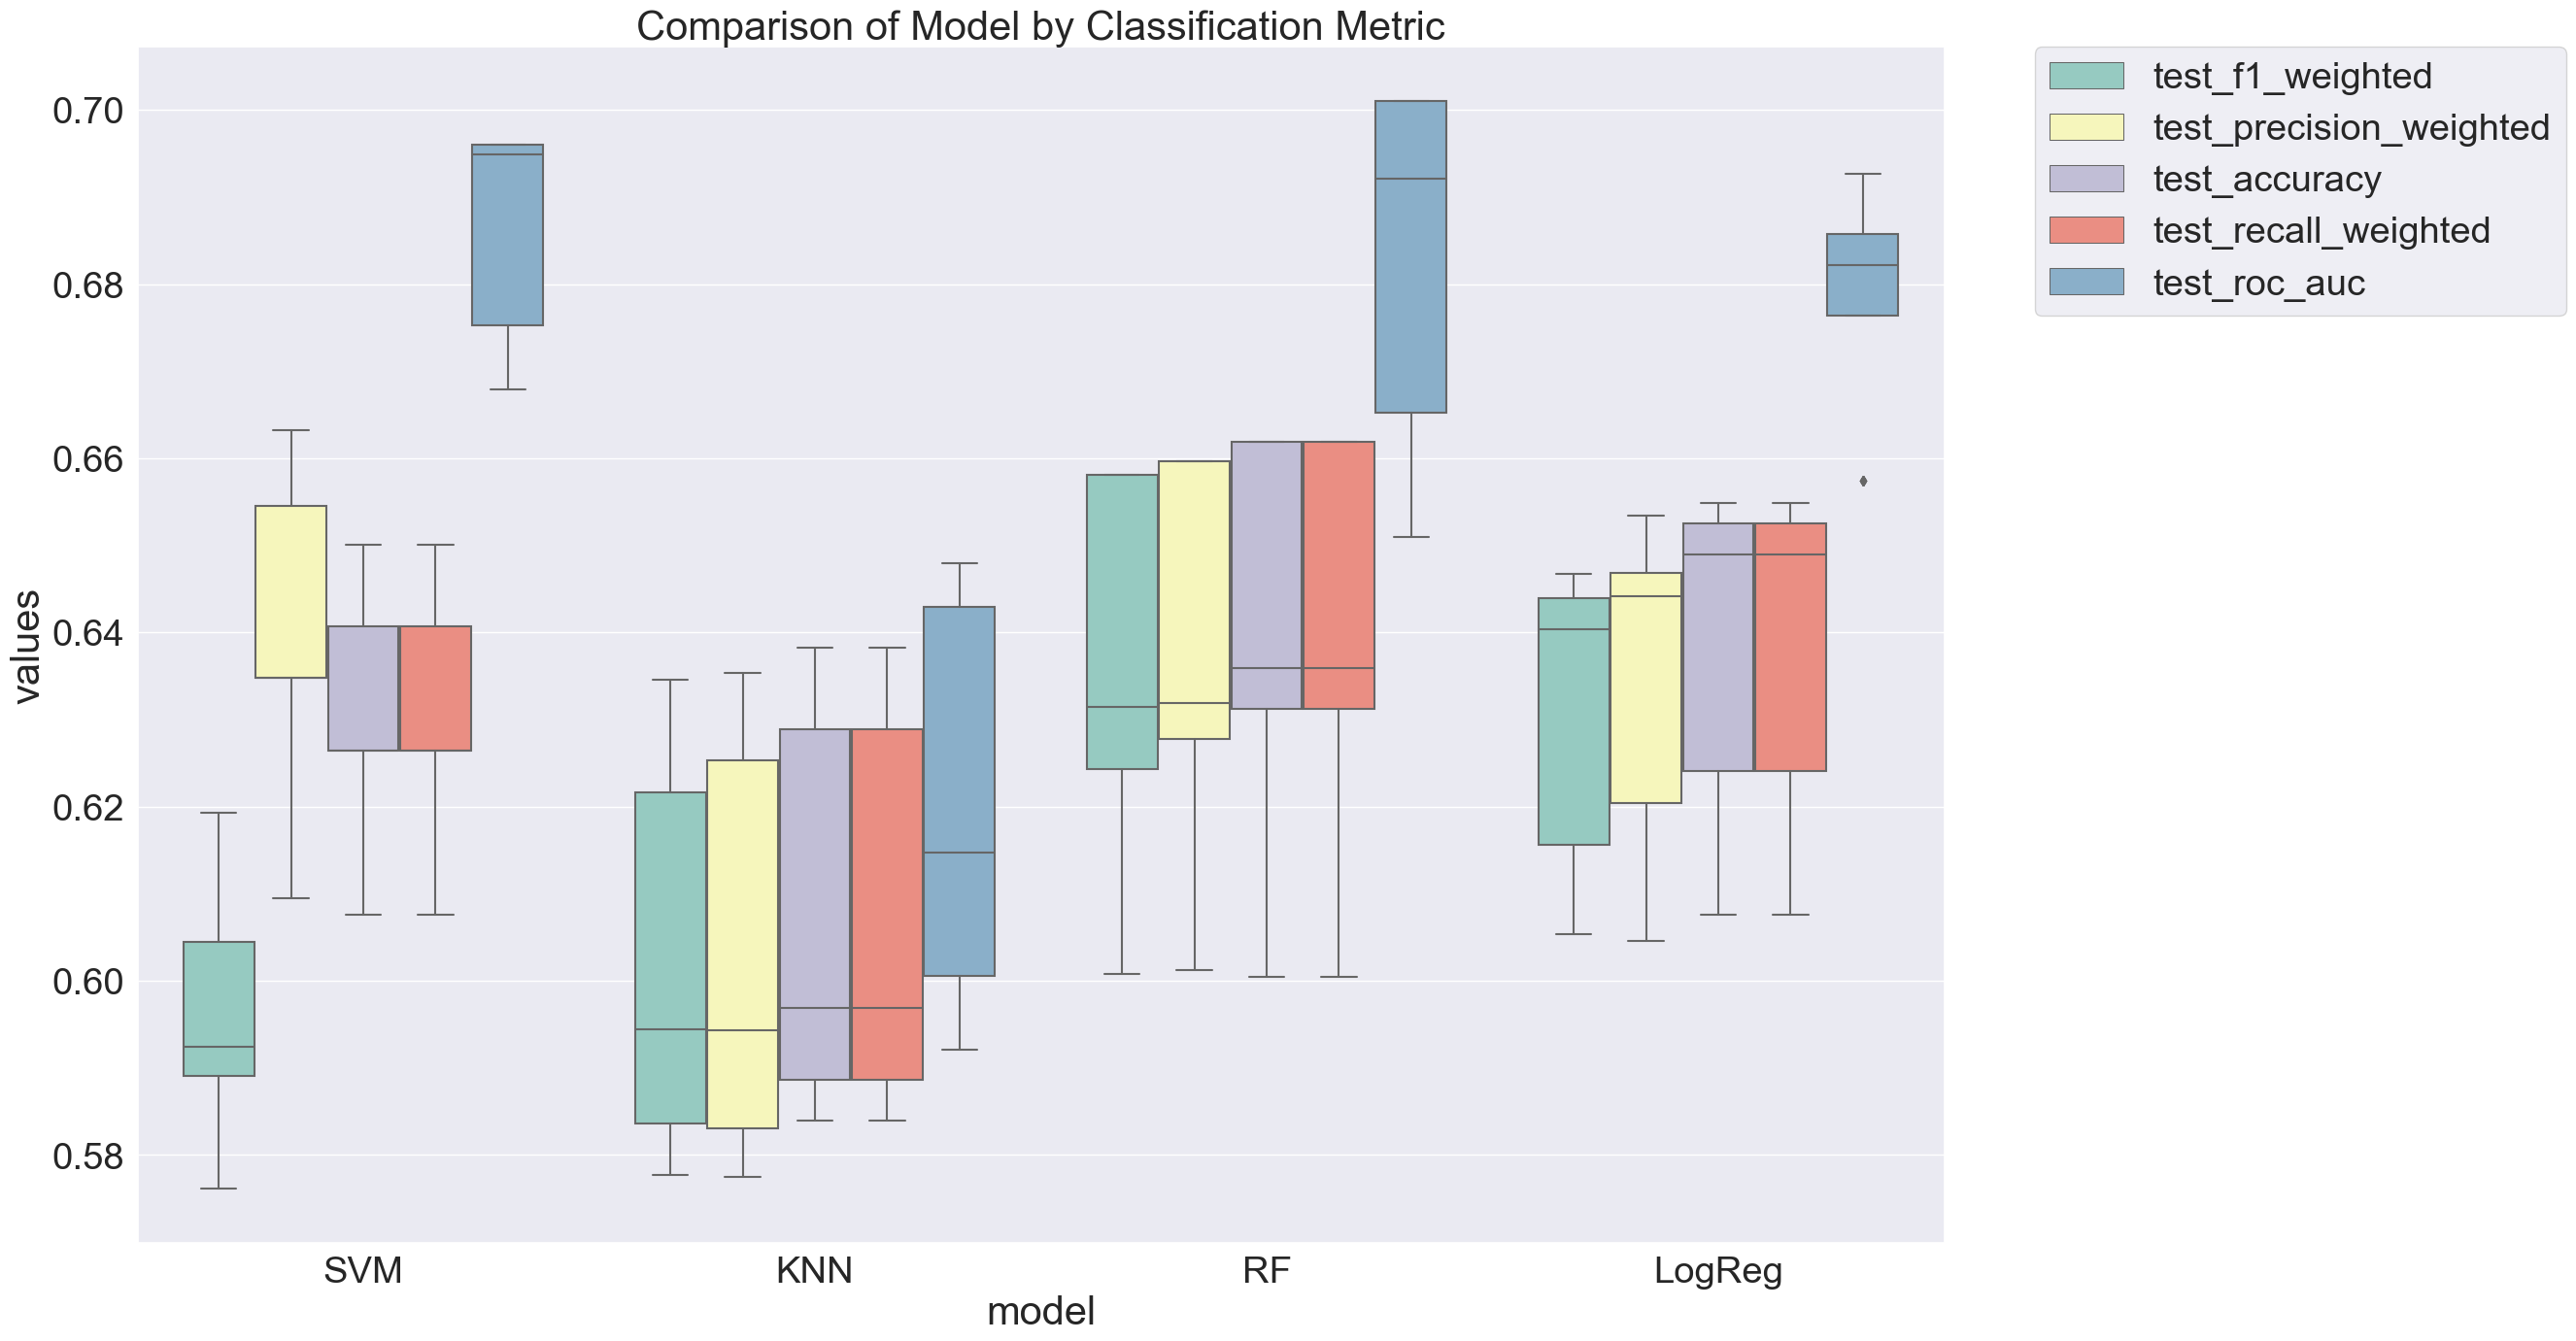

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(24, 16))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Classification Metric')
plt.savefig('./models_performance.png',dpi=300)

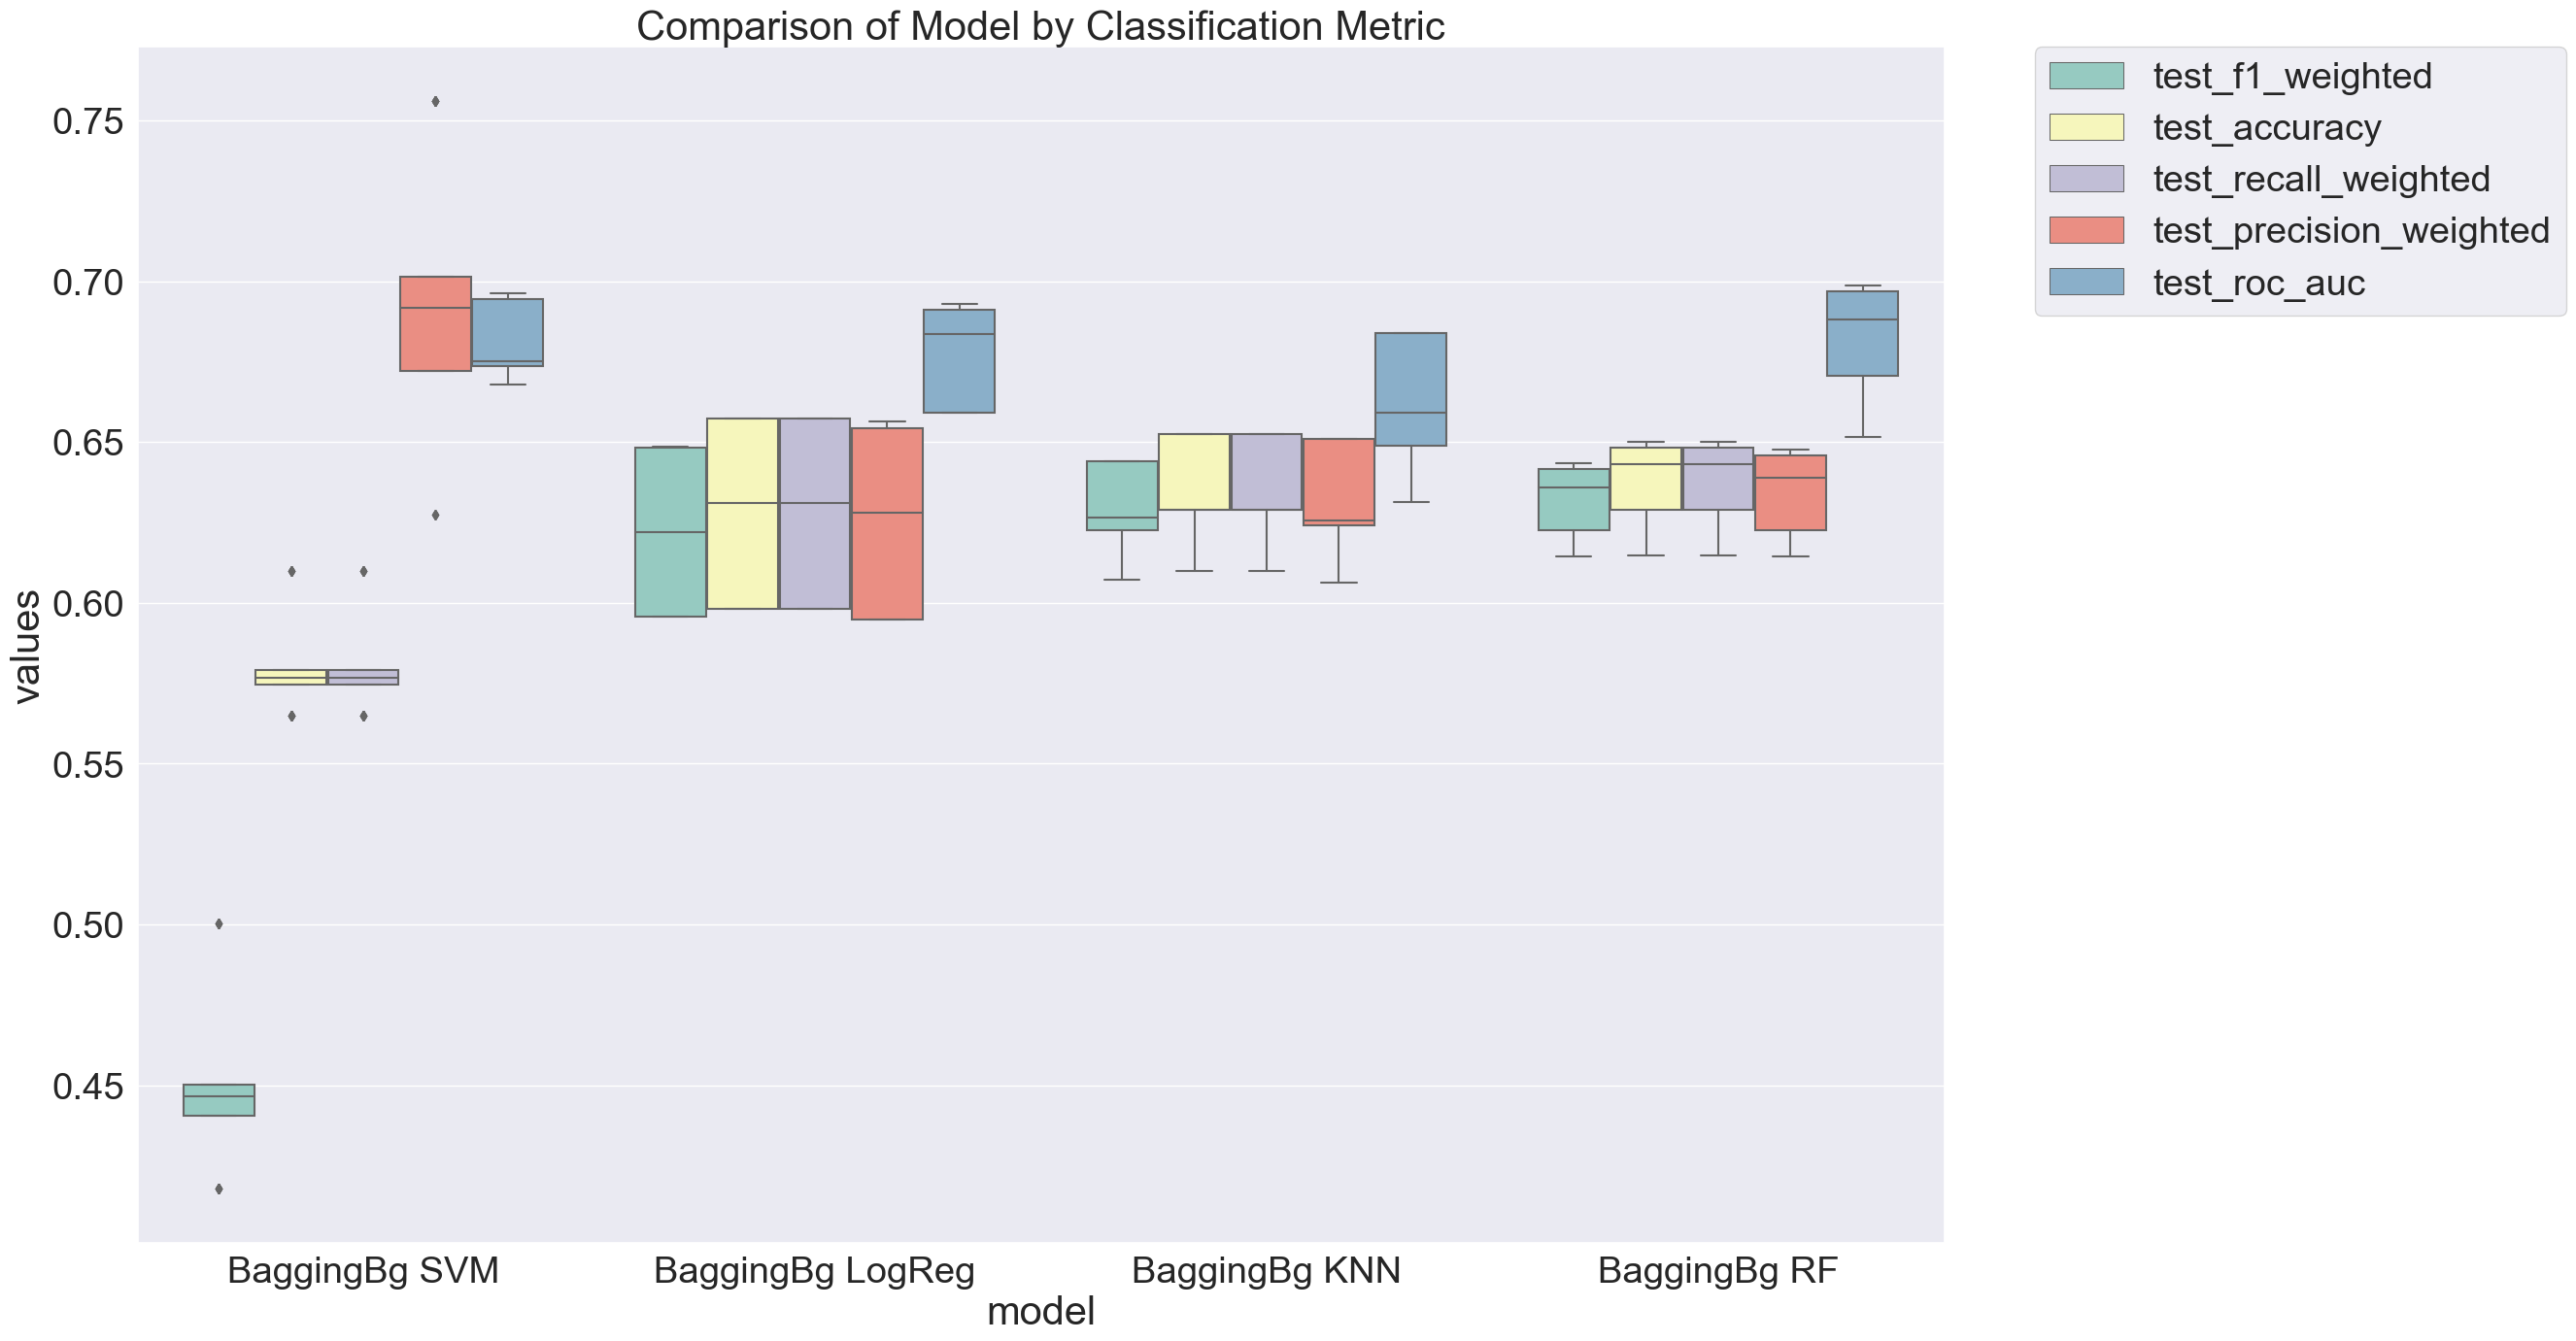

In [66]:
bootstraps = []
for model in list(set(result2.model.values)):
    model_df = result2.loc[result2.model == model]
    bootstrap = model_df.sample(n=30, replace=True)
    bootstraps.append(bootstrap)

bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df, id_vars=['model'], var_name='metrics', value_name='values')
time_metrics = ['fit_time', 'score_time']  # fit time metrics
## PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)]  # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')
## TIME METRICS
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)]  # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(24, 16))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Bagging Models by Classification Metric')
plt.savefig('./bagging_models_performance.png', dpi=300)

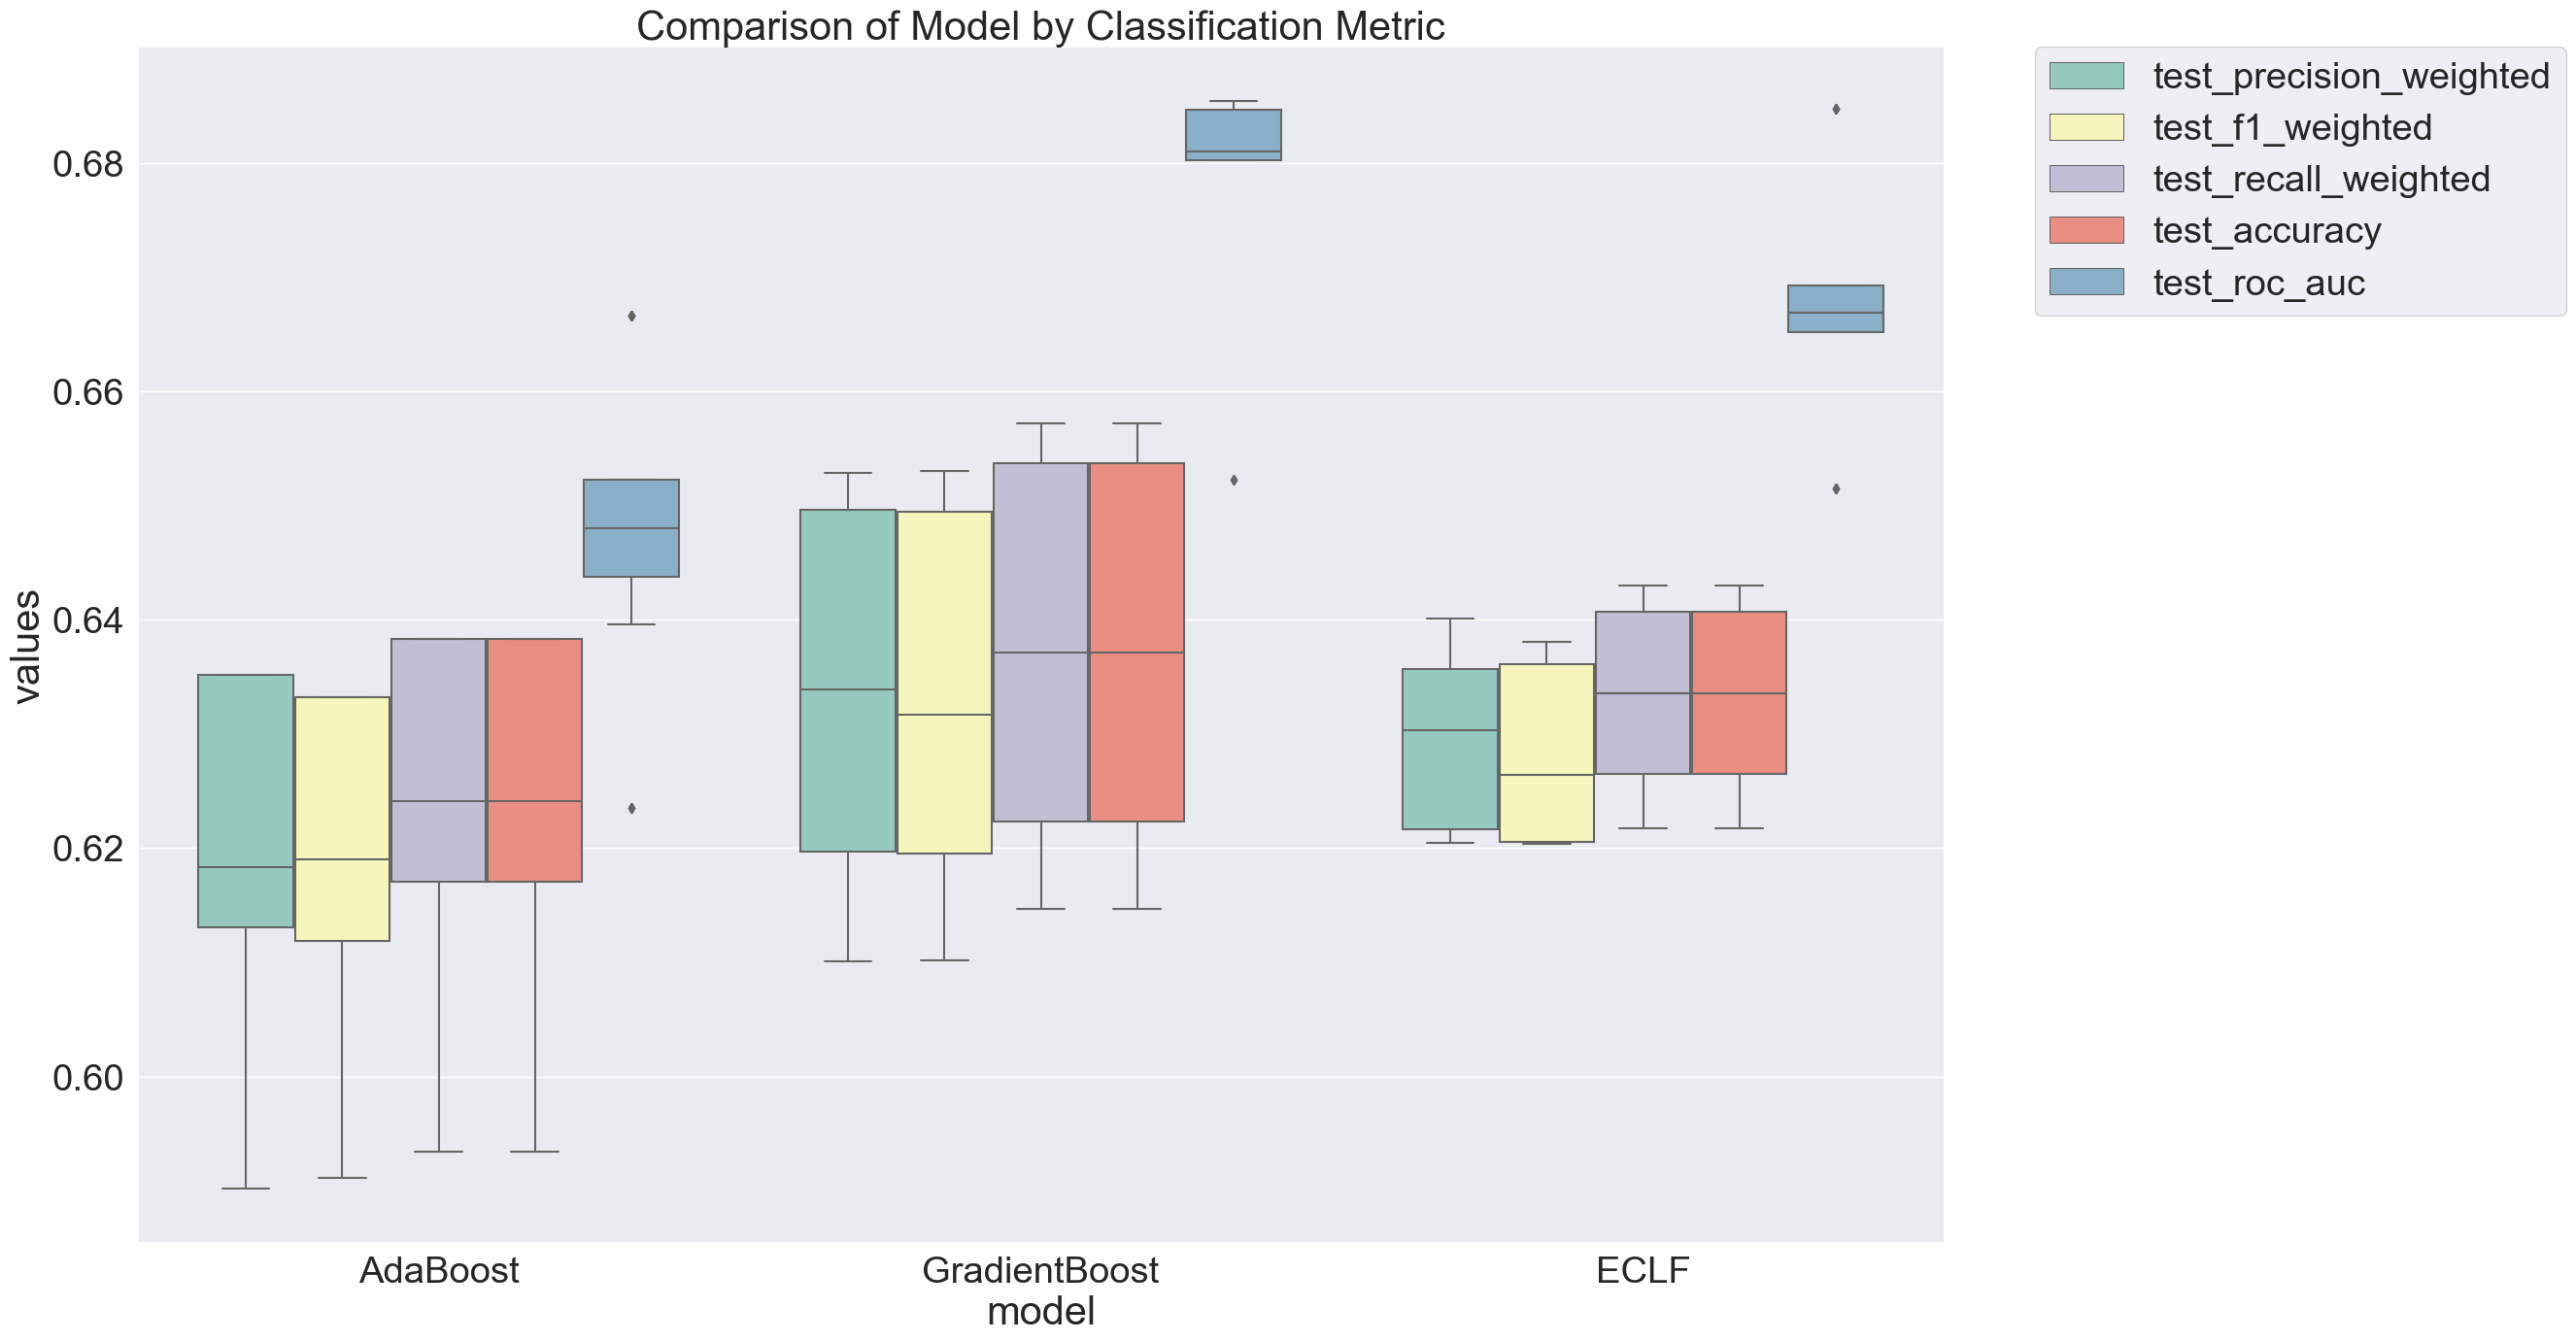

In [67]:
bootstraps = []
for model in list(set(result3.model.values)):
    model_df = result3.loc[result3.model == model]
    bootstrap = model_df.sample(n=30, replace=True)
    bootstraps.append(bootstrap)

bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df, id_vars=['model'], var_name='metrics', value_name='values')
time_metrics = ['fit_time', 'score_time']  # fit time metrics
## PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)]  # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')
## TIME METRICS
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)]  # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(24, 16))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Ensemble Models by Classification Metric')
plt.savefig('./ensemble_models_performance.png', dpi=300)